In [106]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('..\\datas\\CullinaryMapDataset.csv')

In [108]:
# Her şehir-alt kategori kombinasyonunda kaç tarif var
pivot = df.groupby(["eslesen_sehir", "alt_kategori"]).size().unstack(fill_value=0)

# Şehirdeki toplam tarif sayısına göre normalize et
pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Şehir başına toplam tarif sayısı
city_recipe_counts = df.groupby("eslesen_sehir").size()

# Şehir başına benzersiz kullanıcı sayısı
city_user_counts = df.groupby("eslesen_sehir")["profil_adi"].nunique()

# Histogram çizimi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Recipe count histogram
axes[0].hist(city_recipe_counts, bins=range(0, city_recipe_counts.max()+50, 50), color="skyblue", edgecolor="black")
axes[0].set_title("Distribution of Total Recipes per City")
axes[0].set_xlabel("Number of Recipes")
axes[0].set_ylabel("Number of Cities")

# User count histogram
axes[1].hist(city_user_counts, bins=range(0, city_user_counts.max()+50, 50), color="lightgreen", edgecolor="black")
axes[1].set_title("Distribution of Unique Users per City")
axes[1].set_xlabel("Number of Users")
axes[1].set_ylabel("Number of Cities")

plt.tight_layout()
plt.savefig('..\\graphs\\city_recipe_user_histograms.png', dpi=300)
plt.close()


In [110]:
alt_kategori_sehir_sayisi = df.groupby("alt_kategori")["eslesen_sehir"].nunique().sort_values(ascending=False)

# Yazdır
print("Alt kategorilerin geçtiği şehir sayısı:")
print(alt_kategori_sehir_sayisi)

# Bar plot çizimi
plt.figure(figsize=(12, 6))
alt_kategori_sehir_sayisi.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title("Number of Cities per Alt Category")
plt.xlabel("Alt Category")
plt.ylabel("Number of Cities")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Kaydet
plt.savefig('..\\graphs\\alt_category_city_coverage.png', dpi=300)
plt.close()

Alt kategorilerin geçtiği şehir sayısı:
alt_kategori
aperatifler             81
helva-tatli             81
kek                     81
kirmizi-et-yemekleri    81
kofte                   81
                        ..
salamura                35
kanepe                  35
dondurulmus-yemekler    34
pekmez                  26
etli-cig-kofte          14
Name: eslesen_sehir, Length: 65, dtype: int64


In [111]:
import pandas as pd

# Örnek df verisi yüklü olduğunu varsayıyorum

# 81 ilde geçmeyen alt kategoriler
alt_kategori_sehir_sayisi = df.groupby("alt_kategori")["eslesen_sehir"].nunique()
az_sehirde_goren_cats = alt_kategori_sehir_sayisi[alt_kategori_sehir_sayisi < 81].index.tolist()

print("81 ilde geçmeyen alt kategoriler:")
print(az_sehirde_goren_cats)

# Bu alt kategorilerin hangi şehirlerde geçtiğini bul
for cat in az_sehirde_goren_cats:
    sehirler = df.loc[df["alt_kategori"] == cat, "eslesen_sehir"].unique()
    print(f"\nAlt kategori '{cat}' şu şehirlerde var ({len(sehirler)} şehir):")
    print(sehirler.tolist())


81 ilde geçmeyen alt kategoriler:
['baharat-yapimi', 'bakliyat_yemekleri', 'balik-deniz-urunleri', 'corek-hamurisi', 'dolma', 'dondurma', 'dondurmali', 'dondurulmus-yemekler', 'donut-tatli', 'durum', 'etli-cig-kofte', 'etsiz-cig-kofte', 'geleneksel-tatlilar', 'hamburger', 'hosaf', 'kanepe', 'kebap', 'kis', 'kis-hazirliklari-diger', 'kizartma', 'komposto', 'krep-hamurisi', 'lokum', 'manti', 'pekmez', 'recel', 'sakatat-yemekleri', 'salamura', 'sandvic', 'sarma', 'sicak', 'sicak-icecekler', 'soguk-icecekler', 'sos', 'sulu-yemek', 'sut-urunleri', 'tart', 'tost', 'tursu']

Alt kategori 'baharat-yapimi' şu şehirlerde var (37 şehir):
['Ankara', 'Hatay', 'İstanbul', 'Muş', 'Şanlıurfa', 'Aydın', 'İzmir', 'Kahramanmaraş', 'Adana', 'Kayseri', 'Malatya', 'Erzurum', 'Bursa', 'Adıyaman', 'Antalya', 'Diyarbakır', 'Konya', 'Kocaeli', 'Balıkesir', 'Gaziantep', 'Kilis', 'Çanakkale', 'Isparta', 'Gümüşhane', 'Mersin', 'Şırnak', 'Zonguldak', 'Kastamonu', 'Van', 'Batman', 'Bayburt', 'Manisa', 'Afyon', 'Erzi

1- Alt kategoriler dengesiz dağılmış
2- Bazı şehirlerde hiç tarif yok, bazı şehirlerde çok fazla tarif var
3- Bazı şehirlerde çok fazla kullanıcı var, bazı şehirlerde çok az kullanıcı var


✅ Alt kategorileri filtrelemiyorsun çünkü yerel yoğunluklar anlamlı (örneğin deniz ürünleri),

✅ Tüm şehirlerde ≥85 tarif varsa oranlar güvenilir,

❌ Kullanıcı sayısını dışlıyorsun çünkü kültürel ilgiyi değil, nüfusu yansıtıyor,

✅ Oranlarla çalışıyorsun (pivot_norm),

✅ StandardScaler ile ölçeklemeye hazırsın,

✅ Kümeleri veriye göre belirlemek istiyorsun.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot_norm)


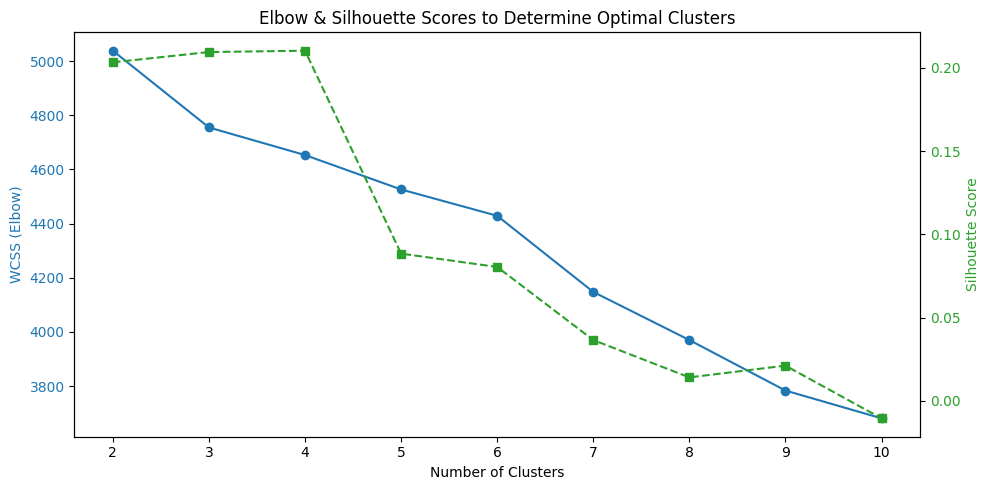

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []
K_range = range(2, 11)  # 2'den 10 kümeye kadar deniyoruz

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Elbow + Silhouette Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.plot(K_range, wcss, 'o-', color=color)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS (Elbow)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.plot(K_range, silhouette_scores, 's--', color=color)
ax2.set_ylabel('Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Elbow & Silhouette Scores to Determine Optimal Clusters")
plt.tight_layout()
plt.show()


In [9]:
kmeans = KMeans(n_clusters=7, random_state=42)
pivot_norm['cluster'] = kmeans.fit_predict(X_scaled)

In [10]:
pivot_norm.groupby("cluster").size()
print(pivot_norm['cluster'].value_counts().sort_index())

# Örnek: her kümeye ait ilk 3 şehir
for i in range(7):
    print(f"\nCluster {i} şehirler:")
    print(pivot_norm[pivot_norm['cluster'] == i].index.tolist()[:])

cluster
0     5
1    37
2     1
3     1
4     1
5     1
6    35
Name: count, dtype: int64

Cluster 0 şehirler:
['Artvin', 'Giresun', 'Iğdır', 'Kilis', 'Çankırı']

Cluster 1 şehirler:
['Adana', 'Adıyaman', 'Ankara', 'Antalya', 'Aydın', 'Ağrı', 'Balıkesir', 'Bilecik', 'Bolu', 'Bursa', 'Denizli', 'Diyarbakır', 'Düzce', 'Edirne', 'Erzincan', 'Eskişehir', 'Hakkari', 'Hatay', 'Isparta', 'Kastamonu', 'Kocaeli', 'Manisa', 'Mardin', 'Mersin', 'Muğla', 'Muş', 'Sakarya', 'Siirt', 'Tekirdağ', 'Tunceli', 'Uşak', 'Van', 'Yalova', 'Çanakkale', 'İstanbul', 'İzmir', 'Şanlıurfa']

Cluster 2 şehirler:
['Ardahan']

Cluster 3 şehirler:
['Kırşehir']

Cluster 4 şehirler:
['Şırnak']

Cluster 5 şehirler:
['Bingöl']

Cluster 6 şehirler:
['Afyon', 'Aksaray', 'Amasya', 'Bartın', 'Batman', 'Bayburt', 'Bitlis', 'Burdur', 'Elazığ', 'Erzurum', 'Gaziantep', 'Gümüşhane', 'Kahramanmaraş', 'Karabük', 'Karaman', 'Kars', 'Kayseri', 'Konya', 'Kütahya', 'Kırklareli', 'Kırıkkale', 'Malatya', 'Nevşehir', 'Niğde', 'Ordu', 'Osma

Oran + Var yok

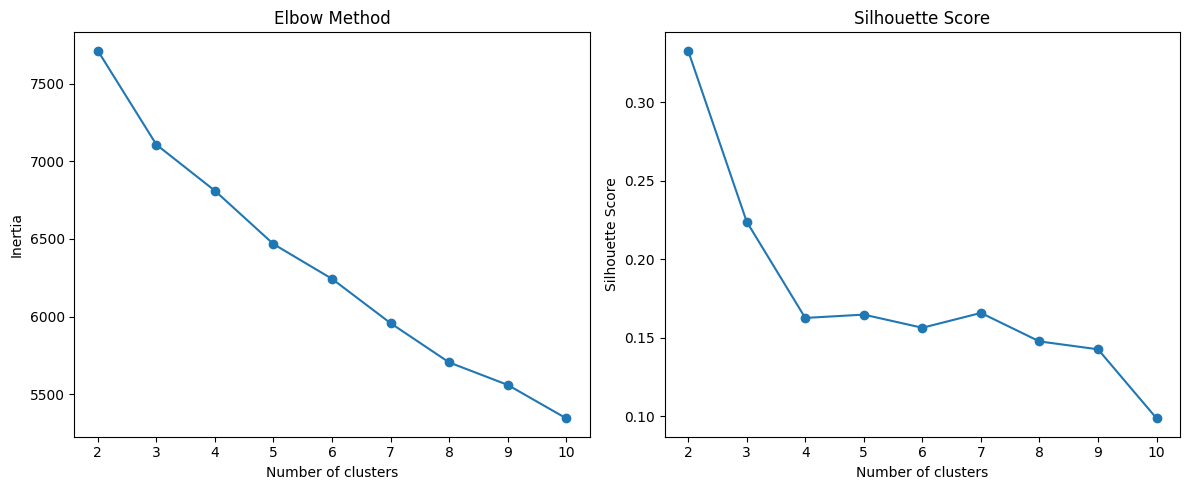

cluster
1    53
3    11
0     8
6     6
2     1
5     1
4     1
Name: count, dtype: int64
alt_kategori   aperatifler_ratio  baharat-yapimi_ratio  \
eslesen_sehir                                            
Adana                   0.026198              0.000893   
Adıyaman                0.009749              0.000696   
Afyon                   0.018290              0.000457   
Aksaray                 0.016613              0.000000   
Amasya                  0.017552              0.000000   

alt_kategori   bakliyat_yemekleri_ratio  balik-deniz-urunleri_ratio  \
eslesen_sehir                                                         
Adana                          0.009527                    0.008336   
Adıyaman                       0.012535                    0.008357   
Afyon                          0.009145                    0.007773   
Aksaray                        0.009110                    0.002680   
Amasya                         0.010436                    0.006641   

alt_k

In [11]:
df = pd.read_csv('..\\datas\\CullinaryMapDataset.csv')
# 1. Pivot tablo (tarif sayısı)
pivot_counts = df.pivot_table(index='eslesen_sehir', columns='alt_kategori', values='tarif_adi', aggfunc='count', fill_value=0)

# 2. Oran hesabı (şehirdeki toplam tarif sayısına göre)
pivot_ratios = pivot_counts.div(pivot_counts.sum(axis=1), axis=0).fillna(0)

# 3. Binary matris (var/yok)
pivot_binary = pivot_counts.gt(0).astype(int)

# 4. Veri setini birleştir (oranlar ve binary)
combined = pd.concat([pivot_ratios.add_suffix('_ratio'), pivot_binary.add_suffix('_bin')], axis=1)

# 5. Ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined)

# 6. Optimum küme sayısı için Elbow metodu
inertia = []
silhouette = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))

# Grafik çizimi
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, '-o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(k_values, silhouette, '-o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# 7. KMeans ile final kümeleme (örnek: k=7)
k_final = 7
kmeans_final = KMeans(n_clusters=k_final, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

# Sonuçları dataframe'e ekle
result_df = combined.copy()
result_df['cluster'] = clusters

print(result_df['cluster'].value_counts())
print(result_df.head())

In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Kategori ağırlıkları
category_totals = pivot_counts.sum(axis=0)
category_weights = 1 / category_totals
category_weights = category_weights.replace(np.inf, 0)

# Ağırlıklı oranlar
weighted_ratios = pivot_ratios.multiply(category_weights, axis=1)

# Standartlaştırma ayrı ayrı
scaler_ratio = StandardScaler()
X_ratio_scaled = scaler_ratio.fit_transform(weighted_ratios)

scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(pivot_binary)

# Binary bloğuna çarpan
X_bin_scaled = X_bin_scaled * 2

# Birleştir
X_combined = np.hstack([X_ratio_scaled, X_bin_scaled])

# KMeans
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(X_combined)

# Sonuçları dataframe'e ekle (sütun isimlerine suffix ekleyerek)
result_df = weighted_ratios.copy()
result_df = result_df.join(pivot_binary, rsuffix='_bin')
result_df['cluster'] = clusters

print(result_df['cluster'].value_counts())
print(result_df.head())


cluster
4    28
3    25
1    13
0     9
6     4
2     1
5     1
Name: count, dtype: int64
alt_kategori   aperatifler  baharat-yapimi  bakliyat_yemekleri  \
eslesen_sehir                                                    
Adana             0.000005        0.000008            0.000003   
Adıyaman          0.000002        0.000006            0.000004   
Afyon             0.000003        0.000004            0.000003   
Aksaray           0.000003        0.000000            0.000003   
Amasya            0.000003        0.000000            0.000003   

alt_kategori   balik-deniz-urunleri     borek  cikolatali     corba  \
eslesen_sehir                                                         
Adana                  2.781386e-06  0.000003    0.000003  0.000003   
Adıyaman               2.788304e-06  0.000002    0.000002  0.000003   
Afyon                  2.593662e-06  0.000003    0.000003  0.000004   
Aksaray                8.940702e-07  0.000003    0.000004  0.000002   
Amasya               

In [13]:
df = pd.read_csv('..\\datas\\CullinaryMapDataset.csv')

In [14]:
pivot_counts = df.pivot_table(index='eslesen_sehir', columns='alt_kategori', values='tarif_adi', aggfunc='count', fill_value=0)

pivot_ratios = pivot_counts.div(pivot_counts.sum(axis=1), axis=0)

# Adım 2: Kategori toplam tarif sayılarını al
category_totals = pivot_counts.sum(axis=0)

# Adım 3: Log-tabanlı ters frekans ağırlıklarını hesapla
category_weights = 1 / np.log1p(category_totals)
category_weights = category_weights.replace([np.inf, -np.inf], 0)

# Adım 4: Oranları ağırlıklarla çarp (kategori bazında)
weighted_ratios = pivot_ratios.multiply(category_weights, axis=1)
# Binary matris (var-yok bilgisi)
pivot_binary = pivot_counts > 0
pivot_binary = pivot_binary.astype(int)

# Binary bilgiyi ayrı scale et
scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(pivot_binary)

# (İsteğe bağlı) Binary etkisini artırmak için çarpan ekle
X_bin_scaled = X_bin_scaled * 2

# Oran verisini de scale et
scaler_ratio = StandardScaler()
X_ratio_scaled = scaler_ratio.fit_transform(weighted_ratios)

# İkisini birleştir
import numpy as np
X_combined = np.hstack([X_ratio_scaled, X_bin_scaled])

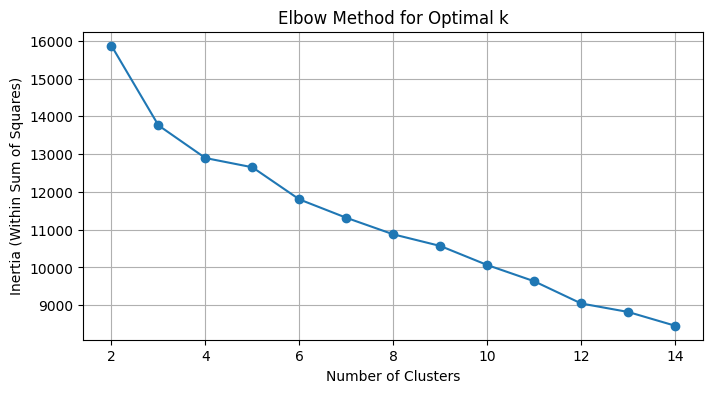

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
K_range = range(2, 15)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_combined)
    inertias.append(km.inertia_)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Within Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


In [16]:
# Küme sayısını seç (örnek: 6)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_combined)

# Sonuçları şehir isimleriyle eşle
result_df = weighted_ratios.copy()
result_df['cluster'] = clusters

In [17]:
print(result_df['cluster'].value_counts())
city_clusters = result_df['cluster']
print(city_clusters.head())

cluster
3    47
1    22
0    11
2     1
Name: count, dtype: int64
eslesen_sehir
Adana       3
Adıyaman    3
Afyon       3
Aksaray     3
Amasya      3
Name: cluster, dtype: int32


In [18]:
import folium
import json
import pandas as pd
from folium.features import GeoJsonTooltip

# GeoJSON'u yükle
with open('..//tr-cities-utf8.json', 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# Şehir → Küme eşleşmesi (city_clusters: Series)
city_cluster_map = result_df['cluster'].to_dict()
n_clusters = result_df['cluster'].nunique()

# Manuel renk paleti (küme sayısı 7'ye kadar desteklenir)
color_palette = [
    '#1f77b4',  # mavi
    '#2ca02c',  # yeşil
    '#ffcc00',  # sarı
    '#d62728',  # kırmızı
    '#9467bd',  # mor
    '#ff7f0e',  # turuncu
    '#e377c2'   # pembe
]

# Haritayı oluştur
m = folium.Map(location=[39, 35], zoom_start=6, tiles='cartodbpositron')

# GeoJSON'daki her şehir için küme ata
for feature in geojson_data['features']:
    city_name = feature['properties']['name']
    cluster = city_cluster_map.get(city_name)
    feature['properties']['cluster'] = cluster if cluster is not None else -1

# Harita katmanı
def style_function(feature):
    cluster = feature['properties']['cluster']
    if cluster == -1:
        return {'fillColor': '#cccccc', 'color': 'black', 'weight': 0.5, 'fillOpacity': 0.3}
    else:
        color = color_palette[cluster % len(color_palette)]
        return {
            'fillColor': color,
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.7
        }

folium.GeoJson(
    geojson_data,
    name='Şehir Kümeleri',
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=['name', 'cluster'],
        aliases=['Şehir:', 'Küme:'],
        localize=True,
        sticky=True
    )
).add_to(m)

folium.LayerControl().add_to(m)

# Lejantı manuel ekleyelim
legend_html = """
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    z-index: 1000;
    background-color: white;
    border: 1px solid black;
    padding: 10px;
    border-radius: 5px;
    font-size: 14px;">
    <b>Küme Renkleri</b><br>
"""

for i in range(n_clusters):
    color = color_palette[i % len(color_palette)]
    legend_html += f'<i style="background:{color};width:18px;height:18px;float:left;margin-right:8px;"></i>Küme {i}<br>'

legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

# Kaydet
m.save('..//graphs//sehir_kume_haritasi_konum4.html')
print("Renkli küme haritası başarıyla oluşturuldu!")


Renkli küme haritası başarıyla oluşturuldu!


In [19]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_combined, result_df['cluster'])
mi_df = pd.DataFrame({
    'feature': list(weighted_ratios.columns) + list(pivot_binary.columns),
    'MI_score': mi_scores
}).sort_values(by='MI_score', ascending=False)

print(mi_df.head(10))

           feature  MI_score
31        komposto  0.394054
74        dondurma  0.331359
78           durum  0.297908
49           sarma  0.290627
27             kis  0.251205
13           durum  0.241406
92             kis  0.229184
10      dondurmali  0.226806
14  ekmek-hamurisi  0.224485
8            dolma  0.213609


In [21]:
from scipy.stats import zscore
cluster_profiles = result_df.groupby("cluster").mean().T
# Her küme için kategori ortalamaları zaten var: cluster_profiles
z_z_scores = cluster_profiles.apply(zscore, axis=0)

# Her küme için en yüksek 3 z-score'a sahip kategoriler
top_z_per_cluster = z_scores.apply(lambda col: col.sort_values(ascending=False).head(3))

print(top_z_per_cluster)

NameError: name 'z_scores' is not defined

kebap kategorisi → Cluster 4'te z-score = 2.38

Kebap tarifleri Cluster 4'te diğer kümelere kıyasla anlamlı şekilde daha yoğun.
Bu küme kebap/ızgara kültürünün baskın olduğu şehirleri temsil ediyor olabilir (örneğin Güneydoğu).

etli-cig-kofte → Cluster 0'da z = 2.15

Bu küme özellikle çiğ köfte içeriğiyle öne çıkıyor. Belki Adıyaman, Şanlıurfa gibi şehirler?

donut-tatli → Cluster 4'te z = 2.33

Belki daha "yenilikçi" veya batılı tatlıların öne çıktığı bir küme.

sarma ve sulu-yemek → Cluster 2'de

Bu grup ev yemeklerine dayalı geleneksel içerikler ile öne çıkıyor.

hamburger, kanepe, tost → Cluster 5'te

Bu şehirler daha "modern/fast-food" tarzı tariflere yönelmiş olabilir.

In [22]:
z_scores = cluster_profiles.apply(zscore, axis=0)

# Her küme için en yüksek 3 z-score
top_z_per_cluster = z_scores.apply(lambda col: col.sort_values(ascending=False).head(3))
print(top_z_per_cluster)

cluster                   0         1         2         3
alt_kategori                                             
kahvaltılık             NaN       NaN  2.520414       NaN
kek                2.975044  3.155924       NaN  3.071254
pasta                   NaN  2.528767       NaN       NaN
sutlu-tatlilar     2.167008       NaN  2.366164  2.407043
tatli-kurabiyeler  2.882902  2.941014  3.870350  2.856960


🎯 Cluster 0:
kek → z = 2.97 → Çok belirgin!

sutlu-tatlilar → z = 2.17 → Ayırıcı.

tatli-kurabiyeler → z = 2.88 → Ayırıcı ve güçlü.

Bu küme tatlı & kek odaklı gibi görünüyor.

🎯 Cluster 1:
kek → z = 3.15 → Çok belirgin.

pasta → z = 2.52 → Ayırıcı.

tatli-kurabiyeler → z = 2.94 → Ayırıcı ve güçlü.

Bu da yine fırın/tatlı ürünleriyle öne çıkan bir küme. Kek + pasta birlikte.

🎯 Cluster 2:
kahvaltılık → z = 2.52 → Ayırıcı.

sutlu-tatlilar → z = 2.36 → Ayırıcı.

tatli-kurabiyeler → z = 3.87 → Çok güçlü belirleyici.

Bu küme daha çok kahvaltı & hafif tatlılar kümesi gibi duruyor.

🎯 Cluster 3:
kek → z = 3.07 → Çok belirgin.

sutlu-tatlilar → z = 2.40 → Belirleyici.

tatli-kurabiyeler → z = 2.85 → Belirgin.

Bu da yine tatlı/ağır kek temasıyla benzer bir küme.



Bazı şehirlerde kek, pasta, tatlı-kurabiyeler gibi kategoriler çok baskın çıkıyor. Bu da baskın oluyor. Az bulunan kategoriler gürültü olarak değerlendiriliyor.

In [112]:
city_category_ratio = weighted_ratios.copy()  # veya city_category_ratio, ne kullandıysan
city_category_ratio = city_category_ratio.fillna(0)

# Toplam şehir sayısı
N = city_category_ratio.shape[0]

# Her kategori kaç şehirde görülüyor (sıfır olmayan şehir sayısı)
category_city_counts = (city_category_ratio > 0).sum(axis=0)

# IDF hesapla
idf = np.log(N / (1 + category_city_counts))

# TF-IDF hesapla
tfidf = city_category_ratio * idf

# Normalizasyon (opsiyonel)
# tfidf = (tfidf - tfidf.mean()) / tfidf.std()

# Sonuç
tfidf.head()

alt_kategori,aperatifler,baharat-yapimi,bakliyat_yemekleri,balik-deniz-urunleri,borek,cikolatali,corba,corek-hamurisi,dolma,dondurma,...,sulu-yemek,sut-urunleri,sutlu-tatlilar,tart,tatli-kurabiyeler,tavuk-yemekleri,tost,tursu,tuzlu-kurabiyeler,zeytinyagli
eslesen_sehir,,,,,,,,,,,,,,,,,,,,,
Adana,-0.000037,0.000144,0.000015,0.0,-0.000063,-0.000035,-0.000061,0.000011,0.000030,0.000119,...,0.000010,0.000033,-0.000080,0.000033,-0.000079,-0.000056,0.000030,0.000020,-0.000020,-0.000019
Adıyaman,-0.000014,0.000112,0.000019,0.0,-0.000048,-0.000025,-0.000062,0.000013,0.000000,0.000088,...,0.000009,0.000054,-0.000078,0.000022,-0.000071,-0.000057,0.000000,0.000032,-0.000017,-0.000013
Afyon,-0.000026,0.000074,0.000014,0.0,-0.000055,-0.000036,-0.000068,0.000019,0.000023,0.000038,...,0.000009,0.000050,-0.000088,0.000023,-0.000075,-0.000039,0.000093,0.000039,-0.000027,-0.000016
Aksaray,-0.000024,0.000000,0.000014,0.0,-0.000061,-0.000045,-0.000042,0.000021,0.000027,0.000067,...,0.000008,0.000047,-0.000067,0.000029,-0.000085,-0.000042,0.000036,0.000044,-0.000030,-0.000018
Amasya,-0.000025,0.000000,0.000016,0.0,-0.000071,-0.000050,-0.000062,0.000023,0.000024,0.000060,...,0.000009,0.000026,-0.000086,0.000017,-0.000076,-0.000036,0.000032,0.000009,-0.000015,-0.000017


In [24]:
scaled_tf = city_category_ratio * 1000
tfidf_scaled = scaled_tf.multiply(tfidf, axis=1)

# TF = log(1 + oran * 1000), böylece hem büyütülür hem log uygulanır
log_scaled_tf = np.log1p(city_category_ratio * 1000)

# Smoothing’li IDF
idf_smooth = np.log1p(N / (1 + category_city_counts))

tfidf_log_scaled = log_scaled_tf.multiply(idf_smooth, axis=1)

In [25]:
print("Adana – TF-IDF Raw:\n", tfidf.loc['Adana'].sort_values(ascending=False).head())
print("\nAdana – TF-IDF Scaled:\n", tfidf_scaled.loc['Adana'].sort_values(ascending=False).head())
print("\nAdana – TF-IDF Log-Scaled:\n", tfidf_log_scaled.loc['Adana'].sort_values(ascending=False).head())


Adana – TF-IDF Raw:
 alt_kategori
baharat-yapimi    0.000144
salamura          0.000124
dondurma          0.000119
dondurmali        0.000080
kis               0.000077
Name: Adana, dtype: float64

Adana – TF-IDF Scaled:
 alt_kategori
sicak-icecekler    0.000063
recel              0.000060
dondurma           0.000053
tart               0.000044
soguk-icecekler    0.000040
Name: Adana, dtype: float64

Adana – TF-IDF Log-Scaled:
 alt_kategori
kek                  1.532586
sutlu-tatlilar       1.383745
tatli-kurabiyeler    1.381414
pasta                1.349227
borek                1.245104
Name: Adana, dtype: float64


In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(tfidf)

tfidf['cluster'] = clusters

In [27]:
print(tfidf['cluster'].value_counts())
city_clusters = tfidf['cluster']
print(city_clusters.head())

cluster
1    65
0     7
3     7
2     2
Name: count, dtype: int64
eslesen_sehir
Adana       1
Adıyaman    1
Afyon       1
Aksaray     0
Amasya      1
Name: cluster, dtype: int32


In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# NaN'leri 0 yap (TF-IDF'de olabilir)
X = tfidf.fillna(0)

# İstersen önce standardize et
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA ile boyutu düşür
pca = PCA(n_components=10)  # 10 boyuta indir
X_pca = pca.fit_transform(X_scaled)

# Şimdi KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Sonuçları ekle
result_df = city_category_ratio.copy()
result_df['cluster'] = clusters
print(result_df['cluster'].value_counts())

cluster
0    41
3    38
2     1
1     1
Name: count, dtype: int64


#Konum + Özellik

In [29]:
print(gdf.columns)

NameError: name 'gdf' is not defined

In [113]:
import geopandas as gpd
from shapely.geometry import shape

# geojson_data zaten yüklü
features = geojson_data['features']

# GeoDataFrame oluştur
gdf = gpd.GeoDataFrame.from_features(features)

gdf['centroid'] = gdf.geometry.centroid
gdf['latitude'] = gdf.centroid.y
gdf['longitude'] = gdf.centroid.x

# İl isimlerini properties['name'] den çıkaralım
gdf['city_name'] = gdf['name']
centers = gdf[['city_name', 'latitude', 'longitude']].set_index('city_name')
print(centers.head())


            latitude  longitude
city_name                      
Adana      37.461414  35.594837
Adıyaman   37.804617  38.335741
Afyon      38.622477  30.655669
Ağrı       39.574599  43.268718
Aksaray    38.371059  33.841554


In [114]:
from geopy.distance import great_circle
import pandas as pd
import numpy as np

cities = centers.index.tolist()
n = len(cities)

distance_matrix = pd.DataFrame(index=cities, columns=cities, dtype=float)

for i in range(n):
    for j in range(n):
        if i == j:
            distance_matrix.iloc[i, j] = 0
        elif pd.isna(distance_matrix.iloc[i, j]):
            loc_i = (centers.iloc[i].latitude, centers.iloc[i].longitude)
            loc_j = (centers.iloc[j].latitude, centers.iloc[j].longitude)
            dist = great_circle(loc_i, loc_j).kilometers
            distance_matrix.iloc[i, j] = dist
            distance_matrix.iloc[j, i] = dist


In [32]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords_2d = mds.fit_transform(distance_matrix)

C:\Users\ASUS\Documents\4\4.3\Bil476\Culinary Map of Turkey\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


In [33]:
import numpy as np

combined_features = np.hstack([X_pca, coords_2d*1])
print(combined_features.shape)  # (N, 12)

(81, 12)


In [34]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(combined_features)

# Sonuçları ekle
result_df = city_category_ratio.copy()
result_df['cluster'] = clusters
print(result_df['cluster'].value_counts())

cluster
3    26
0    25
1    18
2    12
Name: count, dtype: int64


In [115]:
import geopandas as gpd
from libpysal.weights import Queen

gdf = gpd.read_file("../tr-cities-utf8.json")
w = Queen.from_dataframe(gdf)  # Komşuluğa göre (kenar dokunuyorsa) komşu sayar
adjacency_matrix = w.full()[0]  # NumPy adjacency matrix

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18480\1569421157.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)  # Komşuluğa göre (kenar dokunuyorsa) komşu sayar


In [116]:
from libpysal.weights import Queen
w = Queen.from_dataframe(gdf)
adjacency_matrix, _ = w.full()

print(gdf.geometry.is_empty.sum())     # Kaç geometri boş?
print(gdf.geometry.is_valid.sum())     # Kaç geometri geçerli?


0
81


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18480\1551300520.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)


<Axes: >

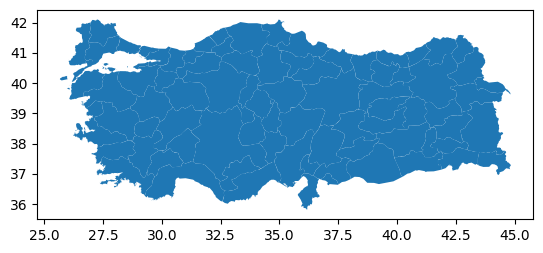

In [117]:
gdf.plot()


In [38]:
from scipy.sparse import csr_matrix

adjacency_matrix_sparse = csr_matrix(adjacency_matrix)
print(adjacency_matrix_sparse.nnz)  # 0’dan büyük olmalı


380


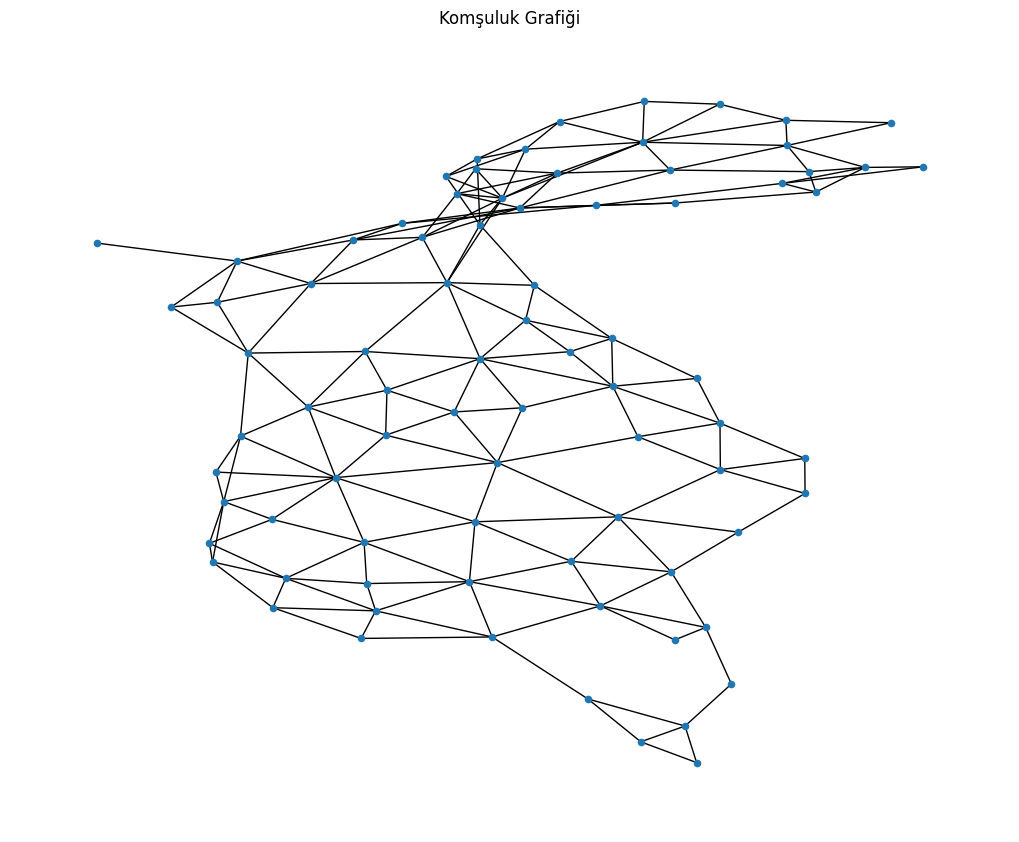

In [118]:
import networkx as nx
import matplotlib.pyplot as plt

G = w.to_networkx()
plt.figure(figsize=(10, 8))
nx.draw(G, node_size=20)
plt.title("Komşuluk Grafiği")
plt.show()


In [119]:
from scipy.sparse import csr_matrix

adjacency_matrix_sparse = csr_matrix(adjacency_matrix)


In [41]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(
    n_clusters=4,
    connectivity=adjacency_matrix_sparse,
    linkage='ward'
)

labels = model.fit_predict(combined_features)


In [42]:
result_df['cluster'] = pd.Series(labels, index=weighted_ratios.index)


In [43]:
import folium
import json
import pandas as pd
from folium.features import GeoJsonTooltip

# GeoJSON'u yükle
with open('..//tr-cities-utf8.json', 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# Şehir → Küme eşleşmesi (city_clusters: Series)
city_cluster_map = result_df['cluster'].to_dict()
n_clusters = result_df['cluster'].nunique()

# Manuel renk paleti (küme sayısı 7'ye kadar desteklenir)
color_palette = [
    '#1f77b4',  # mavi
    '#2ca02c',  # yeşil
    '#ffcc00',  # sarı
    '#d62728',  # kırmızı
    '#9467bd',  # mor
    '#ff7f0e',  # turuncu
    '#e377c2'   # pembe
]

# Haritayı oluştur
m = folium.Map(location=[39, 35], zoom_start=6, tiles='cartodbpositron')

# GeoJSON'daki her şehir için küme ata
for feature in geojson_data['features']:
    city_name = feature['properties']['name']
    cluster = city_cluster_map.get(city_name)
    feature['properties']['cluster'] = cluster if cluster is not None else -1

# Harita katmanı
def style_function(feature):
    cluster = feature['properties']['cluster']
    if cluster == -1:
        return {'fillColor': '#cccccc', 'color': 'black', 'weight': 0.5, 'fillOpacity': 0.3}
    else:
        color = color_palette[cluster % len(color_palette)]
        return {
            'fillColor': color,
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.7
        }

folium.GeoJson(
    geojson_data,
    name='Şehir Kümeleri',
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=['name', 'cluster'],
        aliases=['Şehir:', 'Küme:'],
        localize=True,
        sticky=True
    )
).add_to(m)

folium.LayerControl().add_to(m)

# Lejantı manuel ekleyelim
legend_html = """
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    z-index: 1000;
    background-color: white;
    border: 1px solid black;
    padding: 10px;
    border-radius: 5px;
    font-size: 14px;">
    <b>Küme Renkleri</b><br>
"""

for i in range(n_clusters):
    color = color_palette[i % len(color_palette)]
    legend_html += f'<i style="background:{color};width:18px;height:18px;float:left;margin-right:8px;"></i>Küme {i}<br>'

legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

# Kaydet
m.save('..//graphs//sehir_kume_haritasi_konum4.html')
print("Renkli küme haritası başarıyla oluşturuldu!")


Renkli küme haritası başarıyla oluşturuldu!


In [44]:
import numpy as np

print(adjacency_matrix_sparse.shape)  # (81, 81) olmalı
print(adjacency_matrix_sparse)  # Gözle kontrol için küçük bir bölüm


(81, 81)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 380 stored elements and shape (81, 81)>
  Coords	Values
  (0, 36)	1.0
  (0, 41)	1.0
  (0, 46)	1.0
  (0, 57)	1.0
  (0, 61)	1.0
  (0, 63)	1.0
  (1, 25)	1.0
  (1, 32)	1.0
  (1, 41)	1.0
  (1, 54)	1.0
  (1, 67)	1.0
  (2, 24)	1.0
  (2, 31)	1.0
  (2, 38)	1.0
  (2, 52)	1.0
  (2, 53)	1.0
  (2, 76)	1.0
  (3, 17)	1.0
  (3, 30)	1.0
  (3, 37)	1.0
  (3, 44)	1.0
  (3, 59)	1.0
  (3, 77)	1.0
  (4, 6)	1.0
  (4, 50)	1.0
  :	:
  (75, 16)	1.0
  (75, 28)	1.0
  (75, 29)	1.0
  (76, 2)	1.0
  (76, 24)	1.0
  (76, 53)	1.0
  (76, 55)	1.0
  (77, 3)	1.0
  (77, 17)	1.0
  (77, 35)	1.0
  (77, 68)	1.0
  (77, 70)	1.0
  (78, 20)	1.0
  (78, 51)	1.0
  (79, 5)	1.0
  (79, 23)	1.0
  (79, 46)	1.0
  (79, 48)	1.0
  (79, 50)	1.0
  (79, 60)	1.0
  (79, 71)	1.0
  (79, 73)	1.0
  (80, 12)	1.0
  (80, 26)	1.0
  (80, 42)	1.0


In [45]:
import geopandas as gpd
import networkx as nx
from libpysal.weights import Queen
from networkx.algorithms.community import kernighan_lin_bisection
from matplotlib import pyplot as plt

# Queen komşuluk
w = Queen.from_dataframe(gdf)

# Graph yapısı
G = w.to_networkx()

# Parçalama (örneğin 5 parçaya bölmek için rekürsif böl)
def recursive_partition(graph, num_parts):
    components = [set(graph.nodes)]
    while len(components) < num_parts:
        # En büyük parçayı böl
        largest = max(components, key=len)
        components.remove(largest)

        if len(largest) < 2:
            continue  # bölünemez

        # Alt grafı al
        subgraph = graph.subgraph(largest)
        part1, part2 = kernighan_lin_bisection(subgraph)

        components.append(part1)
        components.append(part2)

    return components[:num_parts]

# Böl (5 kümeye)
clusters = recursive_partition(G, 5)

# Sonuçları dataframe'e yaz
cluster_dict = {}
for i, cluster in enumerate(clusters):
    for node in cluster:
        cluster_dict[node] = i

result_df["cluster"] = gdf.index.map(cluster_dict)



C:\Users\ASUS\AppData\Local\Temp\ipykernel_18480\2375816184.py:8: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)


In [46]:
tfidf.columns

Index(['aperatifler', 'baharat-yapimi', 'bakliyat_yemekleri',
       'balik-deniz-urunleri', 'borek', 'cikolatali', 'corba',
       'corek-hamurisi', 'dolma', 'dondurma', 'dondurmali',
       'dondurulmus-yemekler', 'donut-tatli', 'durum', 'ekmek-hamurisi',
       'etli-cig-kofte', 'etsiz-cig-kofte', 'ev-yemekleri',
       'geleneksel-tatlilar', 'hamburger', 'helva-tatli', 'hosaf',
       'kahvaltılık', 'kanepe', 'kebap', 'kek', 'kirmizi-et-yemekleri', 'kis',
       'kis-hazirliklari-diger', 'kizartma', 'kofte', 'komposto',
       'krep-hamurisi', 'lokum', 'makarna', 'manti', 'meyveli-tatlilar',
       'meze', 'pasta', 'pekmez', 'pide', 'pilav', 'pizza', 'pogaca', 'recel',
       'sakatat-yemekleri', 'salamura', 'salata', 'sandvic', 'sarma',
       'serbetli-tatlilar', 'sicak', 'sicak-icecekler', 'soguk-icecekler',
       'sos', 'sulu-yemek', 'sut-urunleri', 'sutlu-tatlilar', 'tart',
       'tatli-kurabiyeler', 'tavuk-yemekleri', 'tost', 'tursu',
       'tuzlu-kurabiyeler', 'zeytinyagl

In [62]:
import pandas as pd
import geopandas as gpd
import libpysal
from spopt.region import Skater
import folium
from folium.features import GeoJsonTooltip
import json

geojson_path = '..//tr-cities-utf8.json'
gdf_iller = gpd.read_file(geojson_path)

merged_gdf = gdf_iller.merge(tfidf, left_on='name', right_index=True)

# Kümelemede kullanılacak özniteliklerin (yemek kategorileri) listesi
attrs_to_cluster = tfidf.columns.tolist()

w = libpysal.weights.Queen.from_dataframe(merged_gdf)

N_CLUSTERS = 4
model = Skater(merged_gdf, w, n_clusters=N_CLUSTERS, attrs_name=attrs_to_cluster)
model.solve()

# 2.3. Küme etiketlerini birleştirilmiş GeoDataFrame'e ekle
merged_gdf['cluster'] = model.labels_

print(f"{N_CLUSTERS} adet bitişik küme başarıyla oluşturuldu.")
print("Şehir ve Küme Eşleşmeleri:\n", merged_gdf[['name', 'cluster']])

city_cluster_map = merged_gdf.set_index('name')['cluster'].to_dict()
n_clusters = merged_gdf['cluster'].nunique()

# Renk paleti
color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf'
]

# 3.2. Haritayı oluştur
m = folium.Map(location=[39, 35], zoom_start=6, tiles='cartodbpositron')

# 3.3. GeoJSON verisini (orijinal, birleşmemiş haliyle) tekrar oku ve işle
# Çünkü GeoJson katmanı bu formatı bekliyor.
with open(geojson_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# GeoJSON'daki her bir 'feature' için küme bilgisini 'properties' kısmına ekle
for feature in geojson_data['features']:
    city_name = feature['properties']['name']
    cluster = city_cluster_map.get(city_name)
    feature['properties']['cluster'] = int(cluster) if pd.notna(cluster) else -1

# Stil fonksiyonu
def style_function(feature):
    cluster = feature['properties']['cluster']
    if cluster == -1:
        return {'fillColor': '#cccccc', 'color': 'black', 'weight': 0.5, 'fillOpacity': 0.3}
    else:
        # Küme sayısına göre renk paletini güvenli bir şekilde kullan
        color = color_palette[cluster % len(color_palette)]
        return {
            'fillColor': color,
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.7
        }

# GeoJson katmanını haritaya ekle
folium.GeoJson(
    geojson_data,
    name='Şehir Kümeleri',
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=['name', 'cluster'],
        aliases=['Şehir:', 'Küme:'],
        localize=True,
        sticky=True
    )
).add_to(m)

# Lejantı (legend) ekle
legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    z-index: 1000;
    background-color: white;
    border: 1px solid black;
    padding: 10px;
    border-radius: 5px;
    font-size: 14px;">
    <b>Yemek Kültürü Bölgeleri</b><br>
"""
for i in range(n_clusters):
    color = color_palette[i % len(color_palette)]
    legend_html += f'<i style="background:{color};width:18px;height:18px;float:left;margin-right:8px;"></i>Bölge {i}<br>'
legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

folium.LayerControl().add_to(m)

# Haritayı kaydet
output_path = '..//graphs//sehir_yemek_kume_haritasi.html'
m.save(output_path)
print(f"Renkli küme haritası başarıyla oluşturuldu: {output_path}")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18480\3496586557.py:17: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = libpysal.weights.Queen.from_dataframe(merged_gdf)


4 adet bitişik küme başarıyla oluşturuldu.
Şehir ve Küme Eşleşmeleri:
          name  cluster
0       Adana        0
1    Adıyaman        0
2       Afyon        0
3        Ağrı        0
4     Aksaray        0
..        ...      ...
76       Uşak        0
77        Van        0
78     Yalova        0
79     Yozgat        0
80  Zonguldak        0

[81 rows x 2 columns]
Renkli küme haritası başarıyla oluşturuldu: ..//graphs//sehir_yemek_kume_haritasi.html


In [49]:
pip install --upgrade spopt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import spopt
print(spopt.__file__)



C:\Users\ASUS\Documents\4\4.3\Bil476\Culinary Map of Turkey\.venv\Lib\site-packages\spopt\__init__.py


In [69]:
import pandas as pd
import geopandas as gpd
import libpysal
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import folium
from folium.features import GeoJsonTooltip
import json

# 1. Load and prepare data
geojson_path = '..//tr-cities-utf8.json'
gdf_iller = gpd.read_file(geojson_path)
merged_gdf = gdf_iller.merge(tfidf, left_on='name', right_index=True)
attrs_to_cluster = tfidf.columns.tolist()

# 2. Spatial weights matrix
w = libpysal.weights.Queen.from_dataframe(merged_gdf)

# 3. Parameters
N_CLUSTERS = 4
TARGET_SIZE = len(merged_gdf) // N_CLUSTERS
MAX_ITERATIONS = 100

print(f"Target: {N_CLUSTERS} clusters with ~{TARGET_SIZE} cities each")

# 4. Custom balanced spatial clustering
def balanced_spatial_clustering(gdf, n_clusters, attrs, weights, target_size, max_iter=100):
    # Initial KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    gdf['cluster'] = kmeans.fit_predict(gdf[attrs])

    for iteration in range(max_iter):
        # Calculate cluster sizes
        cluster_sizes = gdf['cluster'].value_counts()

        # Check if balanced
        if all(abs(size - target_size) <= 2 for size in cluster_sizes):
            break

        # Find clusters to adjust
        large_clusters = cluster_sizes[cluster_sizes > target_size + 2].index.tolist()
        small_clusters = cluster_sizes[cluster_sizes < target_size - 2].index.tolist()

        if not large_clusters or not small_clusters:
            break

        # For each small cluster, find border cities that can be reassigned
        for small_cluster in small_clusters:
            small_cities = gdf[gdf['cluster'] == small_cluster]

            # Find border cities (those with neighbors in other clusters)
            border_cities = []
            for idx in small_cities.index:
                neighbors = weights.neighbors.get(idx, [])
                neighbor_clusters = set(gdf.loc[neighbors, 'cluster'])
                if len(neighbor_clusters - {small_cluster}) > 0:
                    border_cities.append(idx)

            if not border_cities:
                continue

            # For each border city, find best alternative cluster
            for city_idx in border_cities:
                current_cluster = gdf.at[city_idx, 'cluster']

                # Find neighboring clusters
                neighbors = weights.neighbors.get(city_idx, [])
                neighbor_clusters = gdf.loc[neighbors, 'cluster'].unique()

                # Filter to only clusters that need more cities
                candidate_clusters = [c for c in neighbor_clusters
                                   if c in large_clusters and c != current_cluster]

                if not candidate_clusters:
                    continue

                # Find closest cluster center
                city_data = gdf.loc[city_idx, attrs].values.reshape(1, -1)
                cluster_centers = []
                for cluster in candidate_clusters:
                    center = gdf[gdf['cluster'] == cluster][attrs].mean().values.reshape(1, -1)
                    cluster_centers.append((cluster, center))

                distances = [(c, pairwise_distances(city_data, center)[0][0])
                            for c, center in cluster_centers]
                new_cluster = min(distances, key=lambda x: x[1])[0]

                # Reassign city
                gdf.at[city_idx, 'cluster'] = new_cluster

                # Update cluster sizes
                cluster_sizes = gdf['cluster'].value_counts()

                # Check if we've fixed the imbalance
                if all(abs(size - target_size) <= 2 for size in cluster_sizes):
                    return gdf

    return gdf

# Apply clustering
merged_gdf = balanced_spatial_clustering(
    merged_gdf,
    N_CLUSTERS,
    attrs_to_cluster,
    w,
    TARGET_SIZE,
    MAX_ITERATIONS
)

# 5. Verify final cluster sizes
final_sizes = merged_gdf['cluster'].value_counts()
print("Final cluster sizes:\n", final_sizes)

# 6. Visualization (same as before)
city_cluster_map = merged_gdf.set_index('name')['cluster'].to_dict()
n_clusters = merged_gdf['cluster'].nunique()

color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf'
]

m = folium.Map(location=[39, 35], zoom_start=6, tiles='cartodbpositron')

with open(geojson_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

for feature in geojson_data['features']:
    city_name = feature['properties']['name']
    cluster = city_cluster_map.get(city_name)
    feature['properties']['cluster'] = int(cluster) if pd.notna(cluster) else -1

def style_function(feature):
    cluster = feature['properties']['cluster']
    if cluster == -1:
        return {'fillColor': '#cccccc', 'color': 'black', 'weight': 0.5, 'fillOpacity': 0.3}
    else:
        color = color_palette[cluster % len(color_palette)]
        return {
            'fillColor': color,
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.7
        }

folium.GeoJson(
    geojson_data,
    name='Şehir Kümeleri',
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=['name', 'cluster'],
        aliases=['Şehir:', 'Küme:'],
        localize=True,
        sticky=True
    )
).add_to(m)

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    z-index: 1000;
    background-color: white;
    border: 1px solid black;
    padding: 10px;
    border-radius: 5px;
    font-size: 14px;">
    <b>Yemek Kültürü Bölgeleri</b><br>
"""
for i in range(n_clusters):
    color = color_palette[i % len(color_palette)]
    legend_html += f'<i style="background:{color};width:18px;height:18px;float:left;margin-right:8px;"></i>Bölge {i}<br>'
legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

folium.LayerControl().add_to(m)

output_path = '..//graphs//sehir_yemek_kume_haritasi.html'
m.save(output_path)
print(f"Renkli küme haritası başarıyla oluşturuldu: {output_path}")

Target: 4 clusters with ~20 cities each
Final cluster sizes:
 cluster
0    81
Name: count, dtype: int64
Renkli küme haritası başarıyla oluşturuldu: ..//graphs//sehir_yemek_kume_haritasi.html


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18480\2931218758.py:18: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = libpysal.weights.Queen.from_dataframe(merged_gdf)


In [84]:
tfidf.columns

Index(['aperatifler', 'baharat-yapimi', 'bakliyat_yemekleri',
       'balik-deniz-urunleri', 'borek', 'cikolatali', 'corba',
       'corek-hamurisi', 'dolma', 'dondurma', 'dondurmali',
       'dondurulmus-yemekler', 'donut-tatli', 'durum', 'ekmek-hamurisi',
       'etli-cig-kofte', 'etsiz-cig-kofte', 'ev-yemekleri',
       'geleneksel-tatlilar', 'hamburger', 'helva-tatli', 'hosaf',
       'kahvaltılık', 'kanepe', 'kebap', 'kek', 'kirmizi-et-yemekleri', 'kis',
       'kis-hazirliklari-diger', 'kizartma', 'kofte', 'komposto',
       'krep-hamurisi', 'lokum', 'makarna', 'manti', 'meyveli-tatlilar',
       'meze', 'pasta', 'pekmez', 'pide', 'pilav', 'pizza', 'pogaca', 'recel',
       'sakatat-yemekleri', 'salamura', 'salata', 'sandvic', 'sarma',
       'serbetli-tatlilar', 'sicak', 'sicak-icecekler', 'soguk-icecekler',
       'sos', 'sulu-yemek', 'sut-urunleri', 'sutlu-tatlilar', 'tart',
       'tatli-kurabiyeler', 'tavuk-yemekleri', 'tost', 'tursu',
       'tuzlu-kurabiyeler', 'zeytinyagl

In [88]:
tfidf.drop(columns=['cluster'], inplace=True, errors='ignore')

In [120]:
import pandas as pd
import geopandas as gpd
import libpysal
# Değişiklik 1: Doğru model olan AZP'yi import ediyoruz.
from spopt.region import AZP
import folium
from folium.features import GeoJsonTooltip
import json

# Bu kısım sizin kodunuzla aynı, tfidf DataFrame'inizin yüklendiğini varsayıyoruz.
# Örnek bir tfidf DataFrame'i oluşturalım (Siz kendi verinizi kullanacaksınız)
#-------------------------------------------------------------------------------
geojson_path = '..//tr-cities-utf8.json'
gdf_iller = gpd.read_file(geojson_path)
cities_list = gdf_iller['name'].tolist()


merged_gdf = gdf_iller.merge(tfidf, left_on='name', right_index=True)

# Kümelemede kullanılacak özniteliklerin (yemek kategorileri) listesi
attrs_to_cluster = tfidf.columns.tolist()

w = libpysal.weights.Queen.from_dataframe(merged_gdf)

MIN_CITIES_PER_CLUSTER = 10
N_CLUSTERS = 4

# Her şehri "1" olarak saymak için gerekli sütun
merged_gdf['count'] = 1

# AZP modelini, ihtiyacımıza uygun parametrelerle kuruyoruz.
# 'floor' veya 'floor_variable' burada hala YOK.
model = AZP(
    gdf=merged_gdf,
    w=w,
    attrs_name=attrs_to_cluster,
    n_clusters=N_CLUSTERS,
    random_state=42 # Belirli bir sayı atayarak
)

# Değişiklik: floor ve floor_variable değerlerini AZP nesnesinin öznitelikleri olarak ayarlıyoruz.
# Yani, model objesi üzerinde doğrudan atama yapıyoruz.
model.floor = MIN_CITIES_PER_CLUSTER
model.floor_variable = 'count'

# Şimdi solve() metodunu parametre olmadan çağırın.
model.solve()

# Küme etiketlerini birleştirilmiş GeoDataFrame'e ekle
merged_gdf['cluster'] = model.labels_

print(f"{N_CLUSTERS} adet bitişik küme başarıyla oluşturuldu.")
# Her bir kümedeki şehir sayısını kontrol edelim
print("\nHer Kümedeki Şehir Sayısı:")
print(merged_gdf['cluster'].value_counts().sort_index())
print("\nŞehir ve Küme Eşleşmeleri:\n", merged_gdf[['name', 'cluster']])


# Haritalama kodunuzda herhangi bir değişiklik yapmaya gerek yoktur.
# Buradan sonrası sorunsuz çalışacaktır.

city_cluster_map = merged_gdf.set_index('name')['cluster'].to_dict()
n_clusters = merged_gdf['cluster'].nunique()

color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf'
]

m = folium.Map(location=[39, 35], zoom_start=6, tiles='cartodbpositron')

with open(geojson_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

for feature in geojson_data['features']:
    city_name = feature['properties']['name']
    cluster = city_cluster_map.get(city_name)
    feature['properties']['cluster'] = int(cluster) if pd.notna(cluster) else -1

def style_function(feature):
    cluster = feature['properties']['cluster']
    if cluster == -1:
        return {'fillColor': '#cccccc', 'color': 'black', 'weight': 0.5, 'fillOpacity': 0.3}
    else:
        color = color_palette[cluster % len(color_palette)]
        return {
            'fillColor': color,
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.7
        }

folium.GeoJson(
    geojson_data,
    name='Şehir Kümeleri',
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=['name', 'cluster'],
        aliases=['Şehir:', 'Küme:'],
        localize=True,
        sticky=True
    )
).add_to(m)

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    z-index: 1000;
    background-color: white;
    border: 1px solid black;
    padding: 10px;
    border-radius: 5px;
    font-size: 14px;">
    <b>Yemek Kültürü Bölgeleri</b><br>
"""
for i in range(n_clusters):
    color = color_palette[i % len(color_palette)]
    legend_html += f'<i style="background:{color};width:18px;height:18px;float:left;margin-right:8px;"></i>Bölge {i}<br>'
legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

folium.LayerControl().add_to(m)

output_path = '..//graphs//sehir_yemek_kume_haritasi_min10_AZP.html'
m.save(output_path)
print(f"\nMinimum 10 şehirden oluşan renkli küme haritası başarıyla oluşturuldu: {output_path}")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18480\4062019948.py:23: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = libpysal.weights.Queen.from_dataframe(merged_gdf)


4 adet bitişik küme başarıyla oluşturuldu.

Her Kümedeki Şehir Sayısı:
cluster
0.0    19
1.0    24
2.0    17
3.0    21
Name: count, dtype: int64

Şehir ve Küme Eşleşmeleri:
          name  cluster
0       Adana      1.0
1    Adıyaman      0.0
2       Afyon      1.0
3        Ağrı      2.0
4     Aksaray      1.0
..        ...      ...
76       Uşak      3.0
77        Van      2.0
78     Yalova      3.0
79     Yozgat      3.0
80  Zonguldak      3.0

[81 rows x 2 columns]

Minimum 10 şehirden oluşan renkli küme haritası başarıyla oluşturuldu: ..//graphs//sehir_yemek_kume_haritasi_min10_AZP.html


In [121]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering # Son kümeleme için

# --- Ön Hazırlık ---
# merged_gdf, w, attrs_to_cluster, N_CLUSTERS, MIN_CITIES_PER_CLUSTER tanımlanmış olmalı
# Örn: merged_gdf['count'] = 1

NUM_RUNS = 100 # Kaç kez çalıştırılacağı

# Kümeleme etiketlerini saklamak için bir liste
all_labels = []

print(f"AZP modelini {NUM_RUNS} kez çalıştırıyor...")

for i in range(NUM_RUNS):
    # Her çalıştırmada yeni bir model oluşturmak önemlidir
    model = AZP(
        gdf=merged_gdf,
        w=w,
        attrs_name=attrs_to_cluster,
        n_clusters=N_CLUSTERS
    )
    # Floor ve floor_variable özniteliklerini ata
    model.floor = MIN_CITIES_PER_CLUSTER
    model.floor_variable = 'count'

    try:
        model.solve()
        all_labels.append(model.labels_)
    except Exception as e:
        # Hata durumunda (örneğin, bazı iterasyonlarda çözüm bulunamayabilir)
        # Bu iterasyonu atlayabilir veya loglayabilirsiniz.
        print(f"Çalıştırma {i+1} hata verdi: {e}")
        continue # Bu çalıştırmayı atla ve sonraki iterasyona geç

print(f"{len(all_labels)} başarılı çalıştırma tamamlandı.")

if not all_labels:
    print("Hiçbir başarılı kümeleme sonucu elde edilemedi. Lütfen parametrelerinizi kontrol edin.")
else:
    # --- Uyuşma Matrisi Oluşturma ---
    num_cities = len(merged_gdf)
    co_occurrence_matrix = np.zeros((num_cities, num_cities))

    for labels in all_labels:
        # Her bir çalıştırmanın etiketlerini kullanarak
        for i in range(num_cities):
            for j in range(i + 1, num_cities): # Tekrar eden çiftleri önlemek için
                if labels[i] == labels[j]:
                    co_occurrence_matrix[i, j] += 1
                    co_occurrence_matrix[j, i] += 1 # Matrisi simetrik yap

    # Matrisin köşegenini (kendisiyle aynı kümede olma) de işaretle
    np.fill_diagonal(co_occurrence_matrix, len(all_labels)) # Veya NUM_RUNS

    # Benzerlik Matrisine Dönüştürme
    similarity_matrix = co_occurrence_matrix / len(all_labels) # Başarılı çalıştırma sayısına böl

    # --- Son Kümelemeyi Elde Etme ---
    # Benzerlik matrisini uzaklık matrisine dönüştür (1 - benzerlik)
    distance_matrix = 1 - similarity_matrix

    # Hiyerarşik kümeleme kullanıyoruz. Bu, benzerlik matrisi üzerinden kümeleme için uygundur.
    # affinity='precomputed' sayesinde kendi hazırladığımız uzaklık matrisini kullanırız.
    # linkage='average' yaygın bir bağlantı yöntemidir.
    final_cluster_model = AgglomerativeClustering(
        n_clusters=N_CLUSTERS,
        metric='precomputed', # scikit-learn 1.2+ için "metric" yerine "affinity" kullanılmalıydı
        linkage='average'
    )
    # Scikit-learn'in bazı versiyonlarında 'affinity' yerine 'metric' kullanılır.
    # Eğer hata alırsanız 'metric' yerine 'affinity' deneyin.
    # Örneğin, 'metric' yerine 'affinity' (eski sklearn versiyonları için)
    # final_cluster_model = AgglomerativeClustering(
    #     n_clusters=N_CLUSTERS,
    #     affinity='precomputed',
    #     linkage='average'
    # )

    final_labels = final_cluster_model.fit_predict(distance_matrix)

    # Nihai küme etiketlerini GeoDataFrame'e ekle
    merged_gdf['consensus_cluster'] = final_labels

    print("\nKonsensüs kümeleme tamamlandı.")
    print("Sonuçlar 'merged_gdf' DataFrame'indeki 'consensus_cluster' sütununda.")
    print(merged_gdf['consensus_cluster'].value_counts())

AZP modelini 100 kez çalıştırıyor...
100 başarılı çalıştırma tamamlandı.

Konsensüs kümeleme tamamlandı.
Sonuçlar 'merged_gdf' DataFrame'indeki 'consensus_cluster' sütununda.
consensus_cluster
2    28
0    23
1    17
3    13
Name: count, dtype: int64


In [104]:
city_cluster_map = merged_gdf.set_index('name')['consensus_cluster'].to_dict()
n_clusters = merged_gdf['consensus_cluster'].nunique()

color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf'
]

m = folium.Map(location=[39, 35], zoom_start=6, tiles='cartodbpositron')

with open(geojson_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

for feature in geojson_data['features']:
    city_name = feature['properties']['name']
    cluster = city_cluster_map.get(city_name)
    feature['properties']['cluster'] = int(cluster) if pd.notna(cluster) else -1

def style_function(feature):
    cluster = feature['properties']['cluster']
    if cluster == -1:
        return {'fillColor': '#cccccc', 'color': 'black', 'weight': 0.5, 'fillOpacity': 0.3}
    else:
        color = color_palette[cluster % len(color_palette)]
        return {
            'fillColor': color,
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.7
        }

folium.GeoJson(
    geojson_data,
    name='Şehir Kümeleri',
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=['name', 'cluster'],
        aliases=['Şehir:', 'Küme:'],
        localize=True,
        sticky=True
    )
).add_to(m)

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    z-index: 1000;
    background-color: white;
    border: 1px solid black;
    padding: 10px;
    border-radius: 5px;
    font-size: 14px;">
    <b>Yemek Kültürü Bölgeleri</b><br>
"""
for i in range(n_clusters):
    color = color_palette[i % len(color_palette)]
    legend_html += f'<i style="background:{color};width:18px;height:18px;float:left;margin-right:8px;"></i>Bölge {i}<br>'
legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

folium.LayerControl().add_to(m)

output_path = '..//graphs//sehir_yemek_kume_haritasi_min10_AZP100.html'
m.save(output_path)
print(f"\nMinimum 10 şehirden oluşan renkli küme haritası başarıyla oluşturuldu: {output_path}")


Minimum 10 şehirden oluşan renkli küme haritası başarıyla oluşturuldu: ..//graphs//sehir_yemek_kume_haritasi_min10_AZP100.html


In [105]:
from scipy import stats
import pandas as pd
import numpy as np

# 'merged_gdf' GeoDataFrame'iniz ve 'consensus_cluster' sütununuzun oluştuğunu varsayalım
# 'attrs_to_cluster' ise kümelemede kullanılan TF-IDF sütun adlarınızın listesi

print("Z-Testi ile küme özelliklerini analiz ediyor...")

# Her bir küme için analiz
for cluster_id in sorted(merged_gdf['consensus_cluster'].unique()):
    print(f"\n--- Küme {cluster_id} Analizi ---")
    cluster_data = merged_gdf[merged_gdf['consensus_cluster'] == cluster_id]

    for attr in attrs_to_cluster:
        # Kümenin özellik ortalaması ve standart sapması
        cluster_mean = cluster_data[attr].mean()
        cluster_std = cluster_data[attr].std()
        cluster_n = len(cluster_data)

        # Genel veri setinin özellik ortalaması ve standart sapması (popülasyon olarak kabul)
        # Geniş veri setinde çok sayıda şehir olduğu için örneklem boyutu büyük kabul edilebilir.
        population_mean = merged_gdf[attr].mean()
        population_std = merged_gdf[attr].std() # Eğer popülasyon std. sapması bilinmiyorsa örneklemden tahmin edilir.

        # Eğer kümenin standart sapması sıfırsa (tüm değerler aynıysa) veya örneklem çok küçükse
        # Z-testi uygulanamaz veya anlamsız olur. Bu durumlar için kontrol ekleyelim.
        if cluster_n <= 1 or population_std == 0:
            print(f"  Özellik '{attr}': Yetersiz veri veya sıfır standart sapma. Z-testi uygulanamadı.")
            continue

        # Z-skoru hesaplama
        # Not: Z-testi varsayımı normal dağılım ve bilinen popülasyon standart sapmasıdır.
        # Büyük örneklemler için örneklem standart sapması popülasyon standart sapmasının iyi bir tahminidir.
        try:
            z_score = (cluster_mean - population_mean) / (population_std / np.sqrt(cluster_n))
            p_value = stats.norm.sf(abs(z_score)) * 2 # Çift taraflı p-değeri
        except ZeroDivisionError:
            print(f"  Özellik '{attr}': Standart hata hesaplanırken sıfıra bölme hatası. Z-testi uygulanamadı.")
            continue


        # Anlamlılık kontrolü
        alpha = 0.05 # Anlamlılık düzeyi

        interpretation = ""
        if p_value < alpha:
            if cluster_mean > population_mean:
                interpretation = "İstatistiksel olarak **anlamlı derecede YÜKSEK**"
            else:
                interpretation = "İstatistiksel olarak **anlamlı derecede DÜŞÜK**"
        else:
            interpretation = "İstatistiksel olarak **anlamlı bir fark YOK**"

        print(f"  Özellik '{attr}': Ort.={cluster_mean:.4f}, Z-skor={z_score:.2f}, P-değeri={p_value:.4f} -> {interpretation} (Genel Ort: {population_mean:.4f})")

# Bu analizi yaptıktan sonra, her kümenin hangi özellikler (alt_kategoriler) açısından
# genel ortalamadan belirgin şekilde farklılaştığını görebilirsiniz.
# Bu size her kümenin "temasını" verecektir.

Z-Testi ile küme özelliklerini analiz ediyor...

--- Küme 0 Analizi ---
  Özellik 'aperatifler': Ort.=-0.0000, Z-skor=0.02, P-değeri=0.9819 -> İstatistiksel olarak **anlamlı bir fark YOK** (Genel Ort: -0.0000)
  Özellik 'baharat-yapimi': Ort.=0.0000, Z-skor=-1.13, P-değeri=0.2601 -> İstatistiksel olarak **anlamlı bir fark YOK** (Genel Ort: 0.0001)
  Özellik 'bakliyat_yemekleri': Ort.=0.0000, Z-skor=-1.23, P-değeri=0.2181 -> İstatistiksel olarak **anlamlı bir fark YOK** (Genel Ort: 0.0000)
  Özellik 'balik-deniz-urunleri': Yetersiz veri veya sıfır standart sapma. Z-testi uygulanamadı.
  Özellik 'borek': Ort.=-0.0001, Z-skor=0.37, P-değeri=0.7139 -> İstatistiksel olarak **anlamlı bir fark YOK** (Genel Ort: -0.0001)
  Özellik 'cikolatali': Ort.=-0.0000, Z-skor=-0.23, P-değeri=0.8180 -> İstatistiksel olarak **anlamlı bir fark YOK** (Genel Ort: -0.0000)
  Özellik 'corba': Ort.=-0.0001, Z-skor=1.64, P-değeri=0.1018 -> İstatistiksel olarak **anlamlı bir fark YOK** (Genel Ort: -0.0001)
  Özell

In [122]:
import pandas as pd
import numpy as np
from scipy import stats
attrs_to_cluster = [f'feature_{i}' for i in range(1, 10)]
# --- End of Example Data ---

print("ANOVA ile küme özelliklerini analiz ediyor...")
print("-" * 50)

alpha = 0.05 # Significance level

# Perform ANOVA for each attribute across all clusters
for attr in attrs_to_cluster:
    print(f"\n--- Özellik '{attr}' için ANOVA Analizi ---")

    # Collect data for each cluster for the current attribute
    cluster_groups = []
    for cluster_id in sorted(merged_gdf['consensus_cluster'].unique()):
        cluster_data = merged_gdf[merged_gdf['consensus_cluster'] == cluster_id][attr].values
        if len(cluster_data) > 0: # Only add if there's data in the cluster
            cluster_groups.append(cluster_data)
        else:
            print(f"  Uyarı: Küme {cluster_id} için '{attr}' özelliğinde veri bulunamadı.")


    # Check if there are at least two non-empty groups to compare
    if len(cluster_groups) < 2:
        print(f"  Özellik '{attr}': ANOVA için yeterli küme grubu bulunamadı (en az 2 grup gerekli).")
        continue

    # Check if all groups have variance (not all values are the same)
    # This prevents F_oneway from crashing if a cluster has zero variance
    if any(np.std(g) == 0 for g in cluster_groups if len(g) > 1):
        print(f"  Özellik '{attr}': Bir veya daha fazla küme grubunda sıfır varyans var. ANOVA sonuçları yanıltıcı olabilir veya hesaplanamayabilir.")
        # We can still attempt ANOVA, but be aware of the limitation.

    # Perform one-way ANOVA
    # F_oneway returns the F-statistic and the p-value
    try:
        f_statistic, p_value = stats.f_oneway(*cluster_groups)

        print(f"  F-istatistiği: {f_statistic:.2f}, P-değeri: {p_value:.4f}")

        # Interpretation
        if p_value < alpha:
            print(f"  -> P-değeri ({p_value:.4f}) < alfa ({alpha}), bu nedenle küme ortalamaları arasında **istatistiksel olarak anlamlı bir fark VAR**.")
            print("     (Bu, hangi kümenin/kümelerin farklı olduğunu belirlemek için daha ileri 'post-hoc' testleri gerektirir.)")
        else:
            print(f"  -> P-değeri ({p_value:.4f}) >= alfa ({alpha}), bu nedenle küme ortalamaları arasında **istatistiksel olarak anlamlı bir fark YOK**.")

    except ValueError as e:
        print(f"  Hata: ANOVA hesaplanırken bir sorun oluştu. Detay: {e}")
        print("  Muhtemel neden: Küme boyutları veya varyanslarında sorun olabilir.")

print("\n--- ANOVA Analizi Tamamlandı ---")

ANOVA ile küme özelliklerini analiz ediyor...
--------------------------------------------------

--- Özellik 'feature_1' için ANOVA Analizi ---


KeyError: 'feature_1'